In [1]:
import torch
import torchvision
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from torchvision.transforms import ToTensor, Compose
import matplotlib.pyplot as plt
import numpy as np

import os
import pickle

import h5py
import scipy
from PIL import Image
from scipy import ndimage

In [2]:
train_dataset = datasets.CIFAR10(root='data/', download=True, train=True, transform=ToTensor())
test_dataset = datasets.CIFAR10(root='data/', download=True, train=False, transform=ToTensor())

Files already downloaded and verified
Files already downloaded and verified


In [3]:
def load_CIFAR_batch(filename):
    with open(filename, 'rb') as f:
        datadict = pickle.load(f,encoding='latin1')
        X = datadict['data']
        Y = datadict['labels']
        X = X.reshape(10000, 3, 32, 32).transpose(0,2,3,1).astype("float")
        Y = np.array(Y)
    return X, Y
def load_CIFAR10():
    xs = []
    ys = []
    for b in range(1,6):
        f = os.path.join('data', 'cifar-10-batches-py', 'data_batch_%d' % (b, ))
        X, Y = load_CIFAR_batch(f)
        xs.append(X)
        ys.append(Y)    
    Xtr = np.concatenate(xs)
    Ytr = np.concatenate(ys)
    del X, Y
    Xte, Yte = load_CIFAR_batch(os.path.join('data', 'cifar-10-batches-py', 'test_batch'))
    return Xtr, Ytr, Xte, Yte

In [10]:
X_train, y_train, X_test, y_test = load_CIFAR10()

In [11]:

X_train, y_train, X_test, y_test = split(50000,X_train,y_train,0.2)


In [12]:
print(X_train.shape)
print(y_train.shape)

print(X_test.shape)
print(y_test.shape)

(40000, 32, 32, 3)
(40000,)
(10000, 32, 32, 3)
(10000,)


In [13]:
X_train = np.reshape(X_train, (X_train.shape[0], -1)).T
X_test = np.reshape(X_test, (X_test.shape[0], -1)).T
y_set_train = y_train.reshape(1,-1)
y_set_test = y_test.reshape(1,-1)
X_set_train = X_train
X_set_test = X_test
print(X_set_train.shape)
print(y_set_train.shape)

print(X_set_test.shape)
print(y_set_test.shape)
print(y_set_test.shape)

(3072, 40000)
(1, 40000)
(3072, 10000)
(1, 10000)
(1, 10000)


In [14]:
dists = distance(X_set_test,X_set_train)

result = []

a = [2*i+1 for i in range(1,6)]
for K in a:
    clf = KNN(k=K)
    clf.fit(X_set_train, y_set_train)
        
    predictions = clf.predict(X_set_test,dists)
    accu = accuracy(y_set_test, predictions)
    result.append(accu)
    
print(result)

[0.3435, 0.3411, 0.3454, 0.3394, 0.3391]


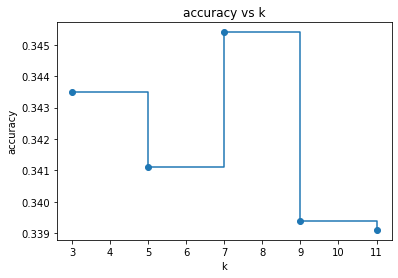

In [15]:
fig, ax = plt.subplots()
ax.set_xlabel("k")
ax.set_ylabel("accuracy")
ax.set_title("accuracy vs k")
ax.plot(a, result, marker="o", drawstyle="steps-post")

plt.show()

In [4]:
X_train, y_train, X_test, y_test = load_CIFAR10()

In [5]:
print(X_train.shape)
print(y_train.shape)

print(X_test.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(50000,)
(10000, 32, 32, 3)
(10000,)


In [6]:
X_train = np.reshape(X_train, (X_train.shape[0], -1)).T
X_test = np.reshape(X_test, (X_test.shape[0], -1)).T
y_set_train = y_train.reshape(1,-1)
y_set_test = y_test.reshape(1,-1)
X_set_train = X_train
X_set_test = X_test
print(X_set_train.shape)
print(y_set_train.shape)

print(X_set_test.shape)
print(y_set_test.shape)


(3072, 50000)
(1, 50000)
(3072, 10000)
(1, 10000)
(1, 10000)


In [8]:
dists = distance(X_set_test,X_set_train)

result = []

a = [2*i+1 for i in range(1,6)]
for K in a:
    clf = KNN(k=K)
    clf.fit(X_set_train, y_set_train)
        
    predictions = clf.predict(X_set_test,dists)
    accu = accuracy(y_set_test, predictions)
    result.append(accu)
    
print(result)


[0.3561, 0.3556, 0.3508, 0.3536, 0.3497]


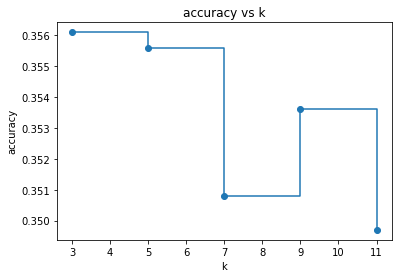

In [9]:
fig, ax = plt.subplots()
ax.set_xlabel("k")
ax.set_ylabel("accuracy")
ax.set_title("accuracy vs k")
ax.plot(a, result, marker="o", drawstyle="steps-post")

plt.show()

In [7]:
from collections import Counter

import numpy as np


def distance(X_test, X_train):

    num_test = X_test.shape[1]
    num_train = X_train.shape[1]
    distances = np.zeros((num_test, num_train))
    n1 = np.dot(X_test.T,X_train)
    n2 = np.multiply(n1, -2)    
    n3 = np.sum(np.square(X_test.T), axis=1, keepdims=True)    
    n4 = np.sum(np.square(X_train), axis=0,keepdims=True)    
    distances = np.sqrt(n2 + n3 + n4)

    return distances


def split(n_samples,X,y,k):
    random_sample_idxs = np.random.choice(n_samples, int(n_samples*k), replace=False)
    X_test = np.array([X[i] for i in random_sample_idxs])
    y_test = np.array([y[i] for i in random_sample_idxs])
    X_train = np.array([X[i] for i in range(n_samples) if i not in random_sample_idxs])
    y_train = np.array([y[i] for i in range(n_samples) if i not in random_sample_idxs])
    return X_train,y_train,X_test,y_test

class KNN:
    def __init__(self, k=3):
        self.k = k

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y


    def predict(self, X, dists):
        
        y_pred = [self._predict(x, dists) for x in range(X.shape[1])]
        return np.array(y_pred)

    def _predict(self, x, dists):

        k_idx = np.argsort(dists[x])[: self.k]
        
        k_neighbor_labels = [self.y_train.T[i][0] for i in k_idx]
       
        most_common = Counter(k_neighbor_labels).most_common(1)
        return most_common[0][0]
    
def accuracy(y_true, y_pred):
    y_true = np.ravel(y_true.T)
    accuracy = np.sum(y_true == y_pred) / len(y_true)
    return accuracy